Trial 90 Complete [00h 00m 39s]
val_loss: 0.4232748746871948

Best val_loss So Far: 0.3606261909008026
Total elapsed time: 00h 46m 29s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          98,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,712,577 (94.27 MB)

 Trainable params: 1,147,777 (4.38 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

Epoch 1/40
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7752 - loss: 0.5122
Epoch 1: val_loss improved from inf to 0.43999, saving model to best_skin_cancer_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - accuracy: 0.7745 - loss: 0.5139 - val_accuracy: 0.7667 - val_loss: 0.4400 - learning_rate: 0.0053
Epoch 2/40
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7494 - loss: 0.6137
Epoch 2: val_loss did not improve from 0.43999
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7490 - loss: 0.6130 - val_accuracy: 0.7682 - val_loss: 0.4713 - learning_rate: 0.0053
Epoch 3/40
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7546 - loss: 0.5104
Epoch 3: val_loss improved from 0.43999 to 0.40084, saving model to best_skin_cancer_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7540 - loss: 0.5110 - val_accuracy: 0.7848 - val_loss: 0.4008 - learning_rate: 0.0053
Epoch 4/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7703 - loss: 0.5706
E

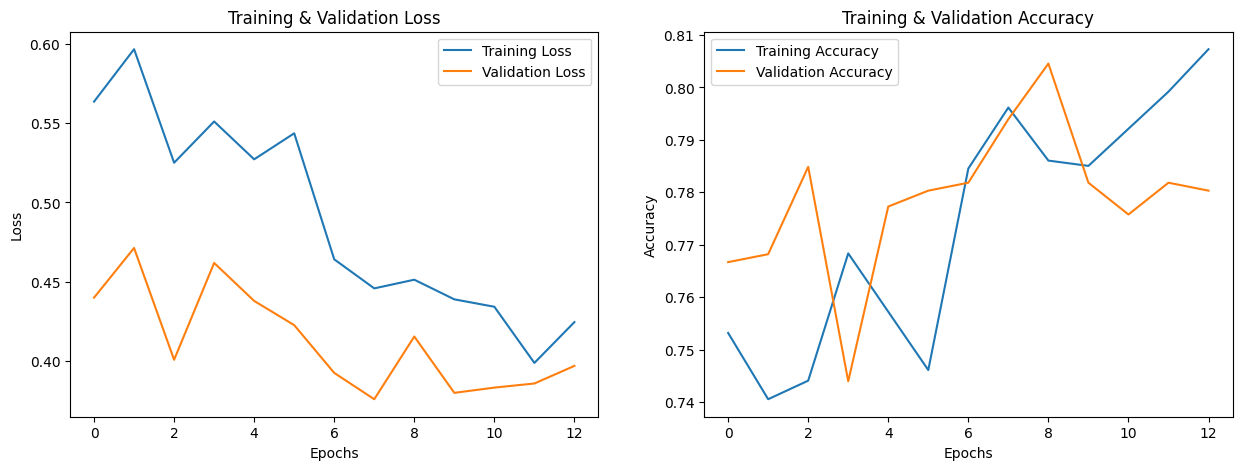

In [1]:
# Prerequisites
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

warnings.filterwarnings('ignore')

# Labels 
labels = ['malignant', 'benign']
img_size = 64  # Resize image size

# dtaaset loading
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img_arr is None:
                    print(f"Error reading image: {img_path}")
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                resized_arr = cv2.cvtColor(resized_arr, cv2.COLOR_BGR2RGB)
                data.append([resized_arr.astype('float32'), class_num])
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data, dtype=object)

train_path = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_path = '/kaggle/input/skin-cancer-malignant-vs-benign/test'

train = get_training_data(train_path)
test = get_training_data(test_path)

plt.figure(figsize=(5, 5))
plt.imshow(train[0][0] / 255)  # Normalize for display
plt.title(labels[train[0][1]])
plt.show()

# data spliiting
X = []
y = []

# Appending training data
for feature, label in train:
    X.append(feature)
    y.append(label)

# Appending test data
for feature, label in test:
    X.append(feature)
    y.append(label)

# Resize data 
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=32)

X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train)

# model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Load the pre-trained ResNet50V2 model
    pretrained_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3), pooling="max")
    
    # Freeze pre-trained layers
    for i in pretrained_model.layers:
        i.trainable = False
    
    model.add(pretrained_model)  # Add the pre-trained model
    
    # Hyperparameter tuning 
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.3, max_value=0.7, step=0.1)))
    
    # Output layer 
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('lr', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create a tuner object
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=40,
    factor=3,
    directory='keras_tuner_dir',
    project_name='skin_cancer_tuning'
)

# EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_skin_cancer_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# hyperparameter search
tuner.search(X_train, y_train, epochs=40, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping, model_checkpoint, lr_reduction])

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Train the final model
history = best_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                         validation_data=(X_val, y_val),
                         epochs=40,
                         callbacks=[early_stopping, model_checkpoint, lr_reduction])

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot the training history
plt.figure(figsize=(15, 5))

# Training & Validation Losses
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training & Validation Accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
